In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


In [7]:
import matplotlib.pyplot as plt

iris=load_iris()
data_df=pd.DataFrame(data=iris.data)

Head of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Shape of the dataset:
(150, 5)
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3023 - loss: 1.1641 - val_accuracy: 0.3333 - val_loss: 1.1262
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5566 - loss: 1.0424 - val_accuracy: 0.4167 - val_loss: 1.0450
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5762 - loss: 0.9488 - val_accuracy: 0.4167 - val_loss: 0.9786
Epoch 4/50
4/4 ━━━━━━━━━━━

Epoch 49/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9571 - loss: 0.0842 - val_accuracy: 0.9167 - val_loss: 0.2151
Epoch 50/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9764 - loss: 0.0859 - val_accuracy: 0.9167 - val_loss: 0.2248
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0648
test accuracy:{accuracy}


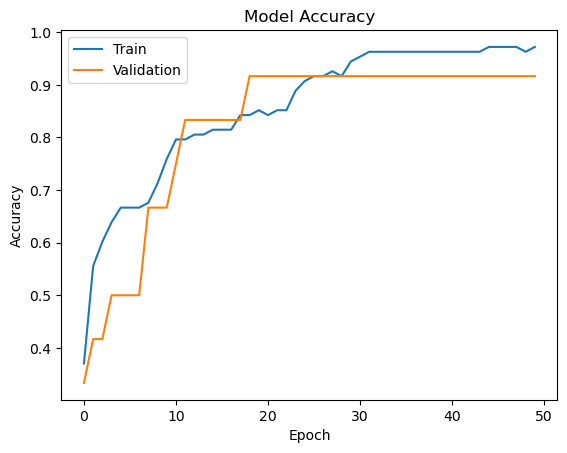

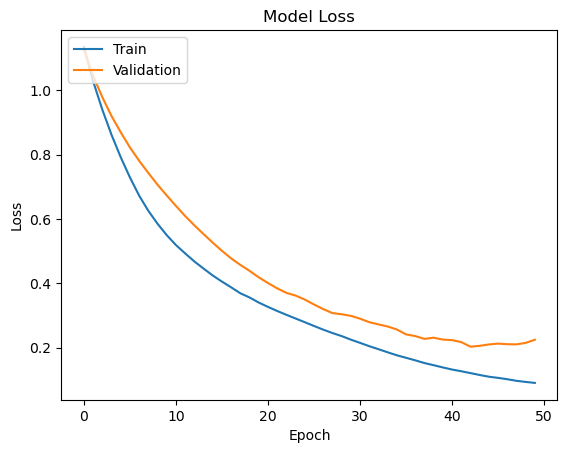

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

iris = load_iris()

data_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

target_df = pd.DataFrame(data=iris.target, columns=['target'])

df = pd.concat([data_df, target_df], axis=1)

print("Head of the dataset:")
print(df.head())
print("Shape of the dataset:")
print(df.shape)

X,y=df.drop('target',axis=1),df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

loss,accuracy=model.evaluate(X_test_scaled,y_test)
print("test accuracy:{accuracy}")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

